In [2]:
import pandas as pd

df = pd.read_csv("MiniProject.csv")
df.head()

,visits,helpfulness,satisfaction,energy,standing,diet
0,1-2 times,Helpful,5,3,Sophomore,2
1,1-2 times,Neither Helpful nor Unhelpful,3,3,Junior,3
2,"0, I don't go to the SRC","N/A, never interacted with SRC staff",3,3,Junior,3
3,"0, I don't go to the SRC",Helpful,3,2,Senior,3
4,1-2 times,"N/A, never interacted with SRC staff",3,2,Sophomore,2


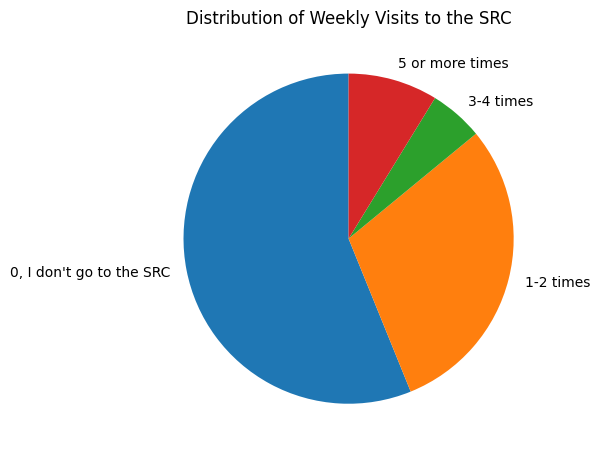

In [3]:
import matplotlib.pyplot as plt
visit_counts = df['visits'].value_counts().sort_index()

visit_counts.plot(kind='pie', autopct='%1.0f%%',  startangle=90,
                  figsize=(6, 6))
plt.title('Distribution of Weekly Visits to the SRC')
plt.ylabel('')
plt.tight_layout()
plt.show()

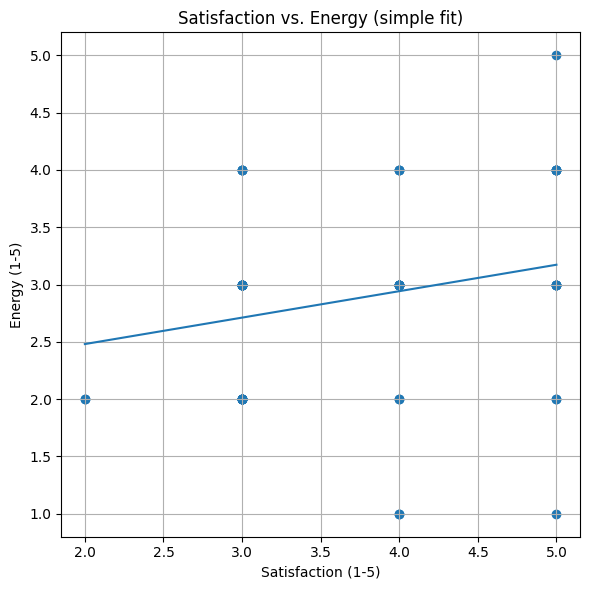

In [6]:
x = df['satisfaction'].values.astype(float)
y = df['energy'].values.astype(float)

x_mean, y_mean = x.mean(), y.mean()
slope_num  = ((x - x_mean) * (y - y_mean)).sum()
slope_denom = ((x - x_mean) ** 2).sum()
m = slope_num / slope_denom          
b = y_mean - m * x_mean              

plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot([x.min(), x.max()],
         [m * x.min() + b, m * x.max() + b])

plt.title("Satisfaction vs. Energy (simple fit)")
plt.xlabel("Satisfaction (1-5)")
plt.ylabel("Energy (1-5)")
plt.grid(True)
plt.tight_layout()
plt.show()